# EDA & Modeling

In [1]:
random_state = 42

## Package loading

In [2]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


## Project name

In [3]:
name = 'regression_concrete_strength'

# Exploratory Data Analysis 

## Thresholds & other parameters

In [4]:
problem_type = 'regression'

In [5]:
data_size = 'small'

In [6]:
threshold_NaN = 0.5

In [7]:
threshold_cat = 5

In [8]:
threshold_Z = 3.0

In [9]:
test_size = 0.33

In [10]:
threshold_entropy = 0.75

In [11]:
undersampling = False

In [12]:
undersampler = 'Random'

In [13]:
threshold_corr = 1.0

In [14]:
threshold_model = 5

In [15]:
threshold_score = 0.7

In [16]:
threshold_feature = 5

In [17]:
with_keras = False

In [18]:
CPU = False

In [19]:
time_dep = False

In [20]:
date_idx = 0

In [21]:
lag_number = 3

In [22]:
level_1_model = 'regression'

## File & target

In [23]:
path = '/home/fifi/Documents/ezstacking/dataset/concrete_data.csv'

In [24]:
df = pd.read_csv(path)

In [25]:
target_col = 'Strength'

### Deployment

In [26]:
FastAPI_port = 8000

In [27]:
Docker_port = 80

# Drop user's columns & Duplicates:

In [28]:
user_drop_cols = []

Dataset before deletion

In [29]:
display(df)

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse_Aggregate  Fine_Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1               1055.0           676.0   28     61.89  
2                932.0           594.0  270     40.27  
3                932.0           594.0  365     41.05  
4                978.4           825.5  360     44.30  
...                ...             ...  ...       ...  
1025             870.1           768.3   28     44.28  
1026             817.9           813.4   28     31.18  
1027             892.4           780.0   28     23.70  
1028             989.6           788.9   28     32.77  
1029             864.5           761.5   28     32.40  

[1030 rows x 9 columns]

In [30]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [31]:
df = duplicates(df)

Number of rows before removing: 1030
Number of duplicate rows: 25
Number of rows after removing: 1005


Dataset after deletion of user’s columns and duplicates

In [32]:
display(df)

Cement  Blast_Furnace_Slag  Fly_Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse_Aggregate  Fine_Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1               1055.0           676.0   28     61.89  
2                932.0           594.0  270     40.27  
3                932.0           594.0  365     41.05  
4                978.4           825.5  360     44.30  
...                ...             ...  ...       ...  
1025             870.1           768.3   28     44.28  
1026             817.9           813.4   28     31.18  
1027             892.4           780.0   28     23.70  
1028             989.6           788.9   28     32.77  
1029             864.5           761.5   28     32.40  

[1005 rows x 9 columns]

### Dataset copy

In [33]:
df_copy = df.copy()

# Dataset Information

### Dataframe structure

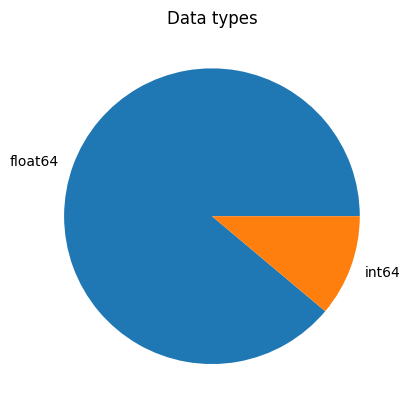

In [34]:
plot_dataframe_structure(df)

### Dataframe statistics

In [35]:
display(df.describe().T)

count        mean         std     min     25%    50%  \
Cement              1005.0  278.631343  104.344261  102.00  190.70  265.0   
Blast_Furnace_Slag  1005.0   72.043483   86.170807    0.00    0.00   20.0   
Fly_Ash             1005.0   55.536318   64.207969    0.00    0.00    0.0   
Water               1005.0  182.075323   21.339334  121.80  166.60  185.7   
Superplasticizer    1005.0    6.033234    5.919967    0.00    0.00    6.1   
Coarse_Aggregate    1005.0  974.376816   77.579667  801.00  932.00  968.0   
Fine_Aggregate      1005.0  772.688259   80.340435  594.00  724.30  780.0   
Age                 1005.0   45.856716   63.734692    1.00    7.00   28.0   
Strength            1005.0   35.250378   16.284815    2.33   23.52   33.8   

                        75%     max  
Cement               349.00   540.0  
Blast_Furnace_Slag   142.50   359.4  
Fly_Ash              118.30   200.1  
Water                192.90   247.0  
Superplasticizer      10.00    32.2  
Coarse_Aggregate    1031.00  1145.0  
Fine_Aggregate       822.20   992.6  
Age                   56.00   365.0  
Strength              44.87    82.6

### Which columns could be categorical ?

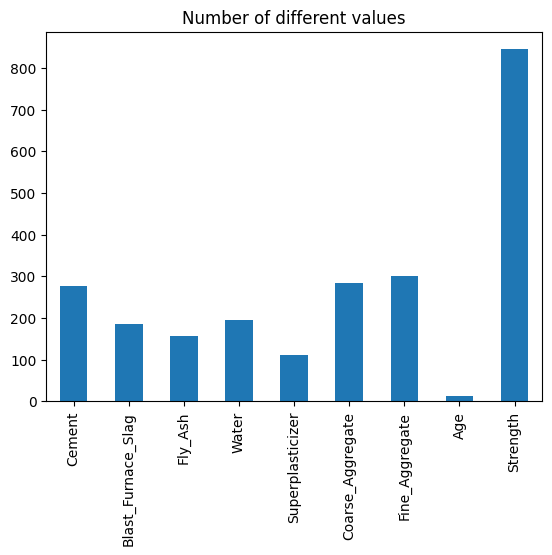

In [36]:
plot_categorical(df)

# Dataset Cleaning

### Drop NaN:

In [37]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [38]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [39]:
display(dropped_cols)

array([], dtype=float64)

### Encoding data:

In [40]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Cement
Encoding numeric column: Blast_Furnace_Slag
Encoding numeric column: Fly_Ash
Encoding numeric column: Water
Encoding numeric column: Superplasticizer
Encoding numeric column: Coarse_Aggregate
Encoding numeric column: Fine_Aggregate
Encoding numeric column: Age
Encoding numeric column: Strength


### Imputing NaN using IterativeImputer

#### Imputation

In [41]:
df = imputation(df)

No need to impute data.


### Data compression:

In [42]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.08MB
Memory usage after optimization is: 0.02MB
Decreased by 67.5%


#### Dataframe structure after compression

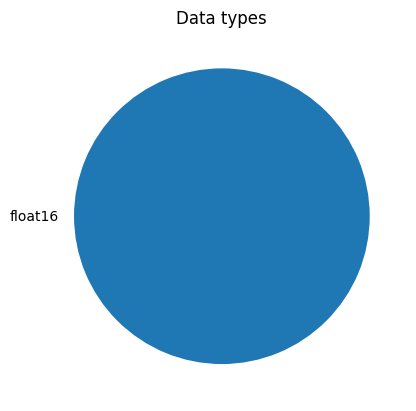

In [43]:
plot_dataframe_structure(df)

### Outliers:

In [44]:
df = outliers(df, threshold_Z)

Using Z_score,  49  rows will be suppressed.


# Correlation according to Pearson

In [45]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [46]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

### Check columns that should be dropped

In [47]:
print(dropped_cols)

[]


# Correlation according to Spearman (hierarchical clustering)

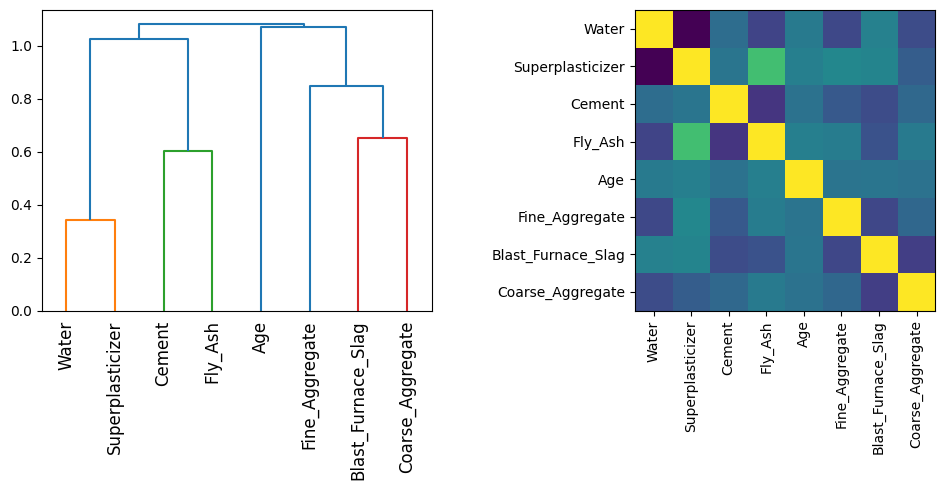

In [48]:
hierarchical_clustering(df.drop(target_col, axis=1))

# Splittings 

In [49]:
df = df_copy

## Splitting dataframe in features and targets

In [50]:
y = df[target_col]

In [51]:
X = df.drop(target_col, axis=1)

## Dimensions

In [52]:
nb_features = len(X.columns.tolist())

In [53]:
nb_targets = 1

In [54]:
layer_size = nb_features + nb_targets + 2

## Splitting data in train and test sets 

In [55]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling=undersampling, undersampler=undersampler, random_state=random_state)

# Modeling

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [56]:
cat_selector = make_column_selector(dtype_include=object)

In [57]:
num_selector = make_column_selector(dtype_include=np.number)

#### For models based on tree

In [58]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [59]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [60]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

#### For models not based on tree

In [61]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [62]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [63]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

#### Level-0 models

In [64]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTRF', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse', random_state = random_state))), 
          ('DTRA', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='absolute_error', random_state = random_state))), 
          ('DTRP', make_pipeline(tree_preprocessor, DecisionTreeRegressor(criterion='poisson', random_state = random_state))), 
          ('RFRS', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='squared_error', n_estimators=100, random_state = random_state))), 
          ('RFRA', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='absolute_error', n_estimators=100, random_state = random_state))), 
          ('RFRP', make_pipeline(tree_preprocessor, RandomForestRegressor(criterion='poisson', n_estimators=100, random_state = random_state))), 
          ('HGBR', make_pipeline(tree_preprocessor, HistGradientBoostingRegressor(early_stopping=True, random_state = random_state))), 
          ('SGDRS', make_pipeline(ntree_preprocessor, SGDRegressor(loss='squared_error', penalty='elasticnet', random_state = random_state))), 
          ('SGDRH', make_pipeline(ntree_preprocessor, SGDRegressor(loss='huber', penalty='elasticnet', random_state = random_state))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15, random_state = random_state))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5, random_state = random_state))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR1', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPR2', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ('SVRL', make_pipeline(ntree_preprocessor, SVR(kernel='linear'))), 
          ('SVRP', make_pipeline(ntree_preprocessor, SVR(kernel='poly'))), 
          ('SVRG', make_pipeline(ntree_preprocessor, SVR(kernel='rbf'))), 
          ]

#### Level-1 model

In [65]:
level_1 = Lasso(alpha=0.1, positive=True, random_state = random_state)

#### Stacking for regression

In [66]:
model = StackingRegressor(level_0, final_estimator=level_1, n_jobs=-1)

# Model fitting

In [67]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/utils/extmath.py:1173: RuntimeWarning: invalid value encountered in divide
  * (last_sum / last_over_new_count - new_sum) ** 2
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: T

CPU times: user 579 ms, sys: 238 ms, total: 817 ms
Wall time: 54.2 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e8ba870a0>),
                                                                                ('pipeline-2',
                                                                                 Pipel...
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e8ba870a0>),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e8ba87850>)])),
                                               ('svr', SVR())]))],
                  final_estimator=Lasso(alpha=0.1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

# Model evaluation

### Model scoring

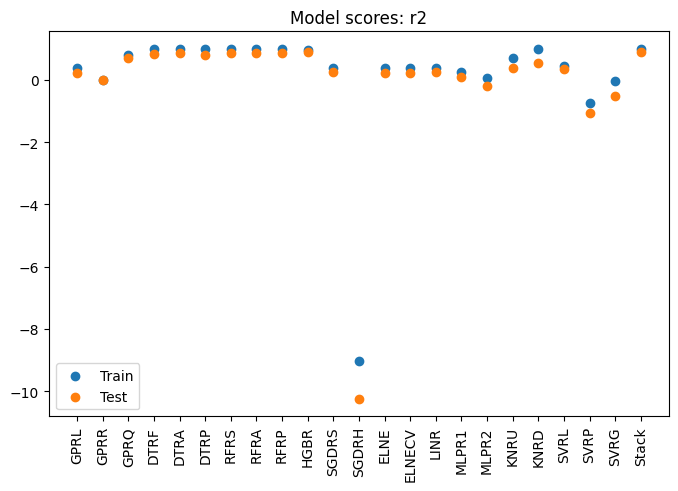

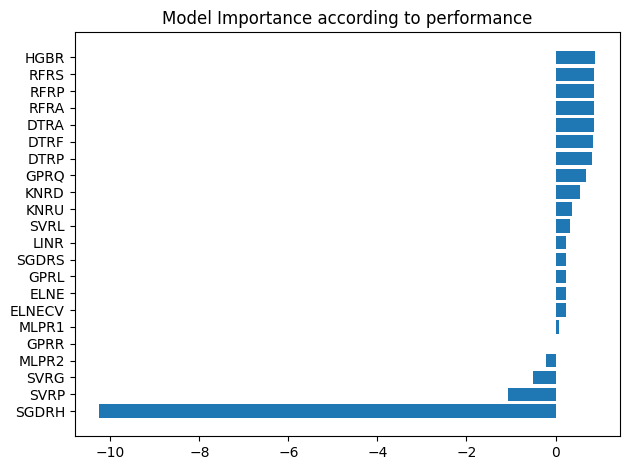

In [68]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### $R^2$ score

In [69]:
K_r2(model,X_train, y_train, X_test, y_test)

# Model inspection

### Model importance

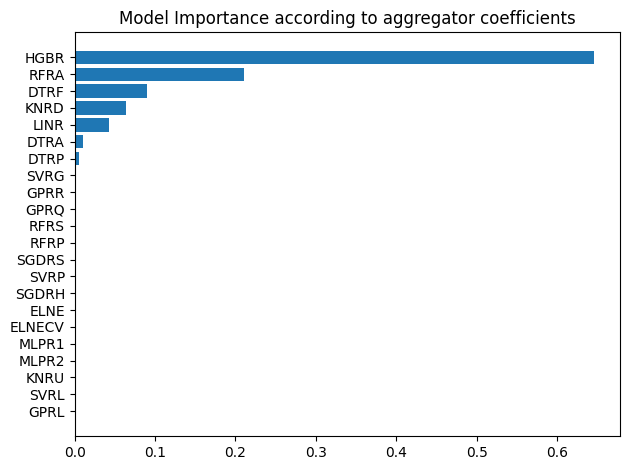

In [70]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

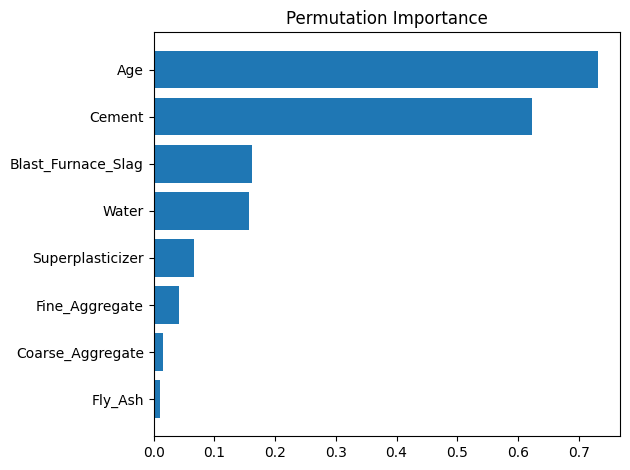

In [71]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Level-0 model elimination

#### Filtered Level-0 models

In [72]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Level-1 model with filtration

In [73]:
level_1 = Lasso(alpha=0.1, positive=True)

#### Build filtered model

In [74]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

# Filtered Model fitting

In [75]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 109 ms, sys: 1.69 ms, total: 111 ms
Wall time: 8.85 s


StackingRegressor(estimators=[('DTRF',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e8ba870a0>),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleIm...
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('ordinalencoder',
                                                                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                 unknown_value=-1))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e8ba87850>)])),
                                               ('histgradientboostingregressor',
                                                HistGradientBoostingRegressor(early_stopping=True,
                                                                              random_state=42))]))],
                  final_estimator=Lasso(alpha=0.1, positive=True), n_jobs=-1)

# Filtered Model evaluation

### Filtered Model scoring

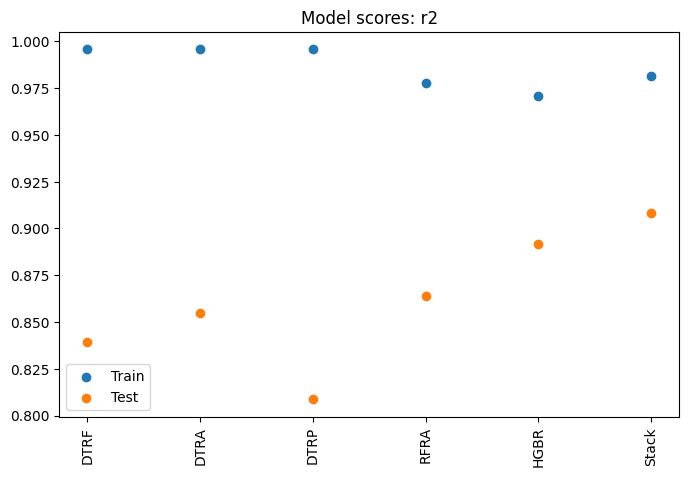

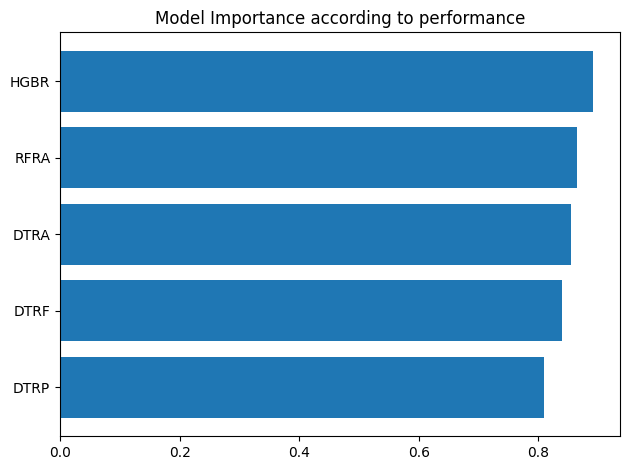

In [76]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered $R^2$ score

In [77]:
K_r2(model,X_train, y_train, X_test, y_test)

# Filtered Model inspection

### Filtered Model importance

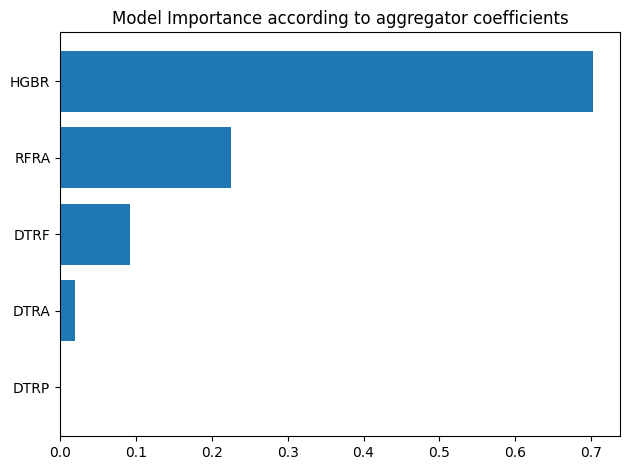

In [78]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

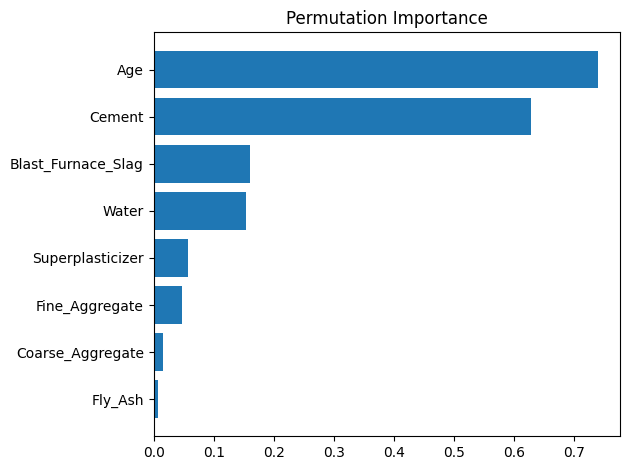

In [79]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [80]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [81]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

### Check those columns, they should be dropped

In [82]:
print(dropped_cols)

['Coarse_Aggregate', 'Fine_Aggregate', 'Fly_Ash']


# Final Model

In [83]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [84]:
reduce_schema('column_name', dropped_cols)

# Splitting

In [85]:
y = df[target_col] 

In [86]:
X = df.drop(target_col, axis=1) 

## Dimensions

In [87]:
nb_features = len(X.columns.tolist()) 

In [88]:
nb_targets = 1 

In [89]:
layer_size = nb_features + nb_targets + 2 

## Splitting data in train and test sets 

In [90]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

In [91]:
threshold_score = 0.7

#### Build final model

In [92]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

# Final Model fitting

In [93]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 88.4 ms, sys: 16.1 ms, total: 105 ms
Wall time: 5.8 s


StackingRegressor(estimators=[('DTRF',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e8ba870a0>),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleIm...
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('ordinalencoder',
                                                                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                 unknown_value=-1))]),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4e8ba87850>)])),
                                               ('histgradientboostingregressor',
                                                HistGradientBoostingRegressor(early_stopping=True,
                                                                              random_state=42))]))],
                  final_estimator=Lasso(alpha=0.1, positive=True), n_jobs=-1)

# Final Model evaluation

### Final Model scoring

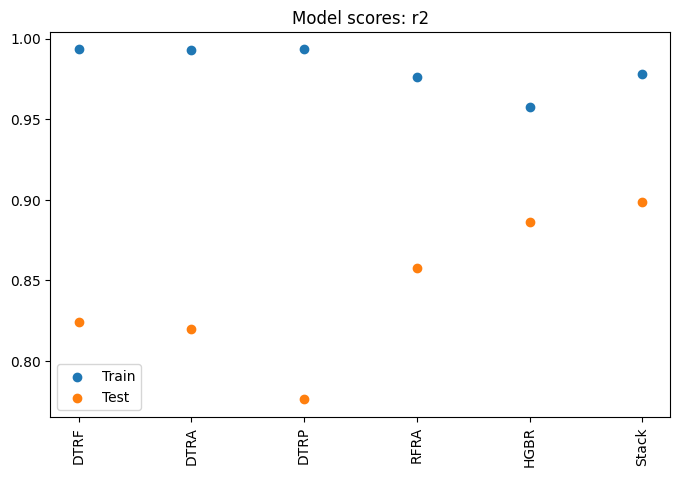

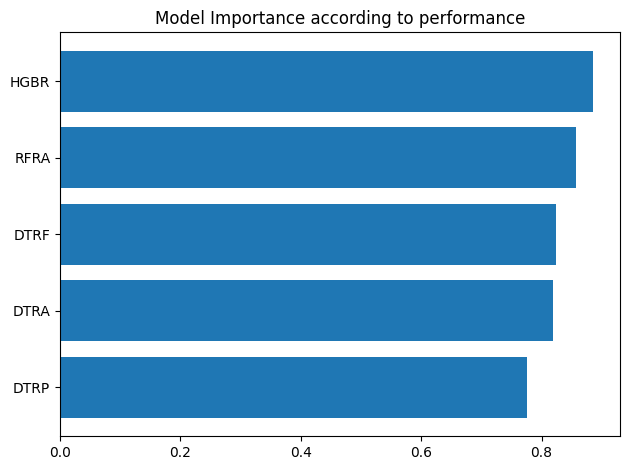

In [94]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

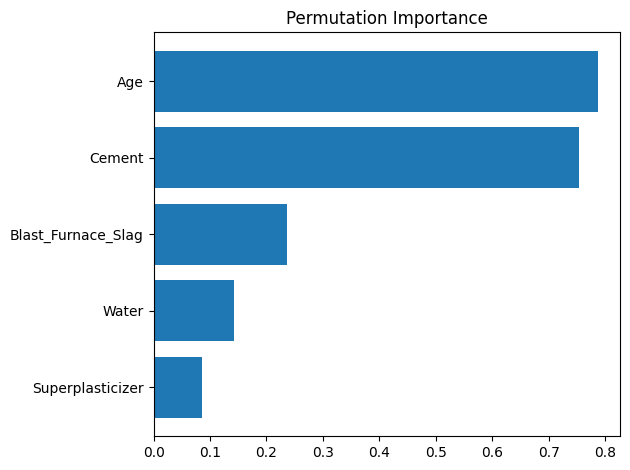

In [95]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

#### Final feature elimination

In [96]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final $R^2$ score

In [97]:
K_r2(model,X_train, y_train, X_test, y_test)

# Final Model inspection

### Final Model importance

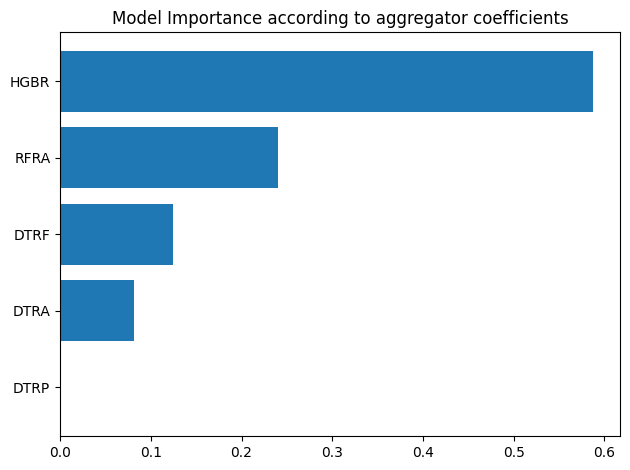

In [98]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

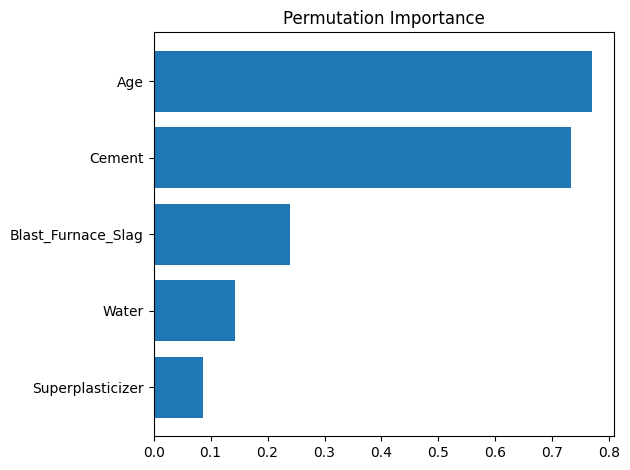

array([['Superplasticizer', 0.08727142805336993],
       ['Water', 0.14362812561784385],
       ['Blast_Furnace_Slag', 0.23868983341013408],
       ['Cement', 0.7323736189165639],
       ['Age', 0.7694566978663862]], dtype=object)

In [99]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [100]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU)

interactive(children=(Dropdown(description='feature', options=('Cement', 'Blast_Furnace_Slag', 'Water', 'Super…

# Deployment

## Save your model

In [101]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

## Generate your server

In [102]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port, with_keras)

## [Test your API](./server.ipynb)

## Docker

In [103]:
dockerize(name, model, model_name, X, y, Docker_port, with_keras)